## Question 1

For the function J(w) = w^2 + (54/w), implement the following methods:

### (a)

Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method

### Solution

In [10]:
def J(w):
    return w**2 + 54 / w

def halving_method(J, a, b, epsilon=1e-6):
    wm = (a + b) / 2
    L = b - a
    
    while abs(L) >= epsilon:
        w1 = a + L / 4
        w2 = b - L / 4
        
        J_wm = J(wm)
        J_w1 = J(w1)
        J_w2 = J(w2)
        
        if J_w1 < J_wm:
            b = wm
            wm = w1
        elif J_w2 < J_wm:
            a = wm
            wm = w2
        else:
            a = w1
            b = w2
        
        L = b - a
    
    return wm

In [11]:
# Initial interval
a = 2.89
b = 3.07
epsilon = 1e-6

# Find the critical point using interval halving method
critical_point = halving_method(J, a, b, epsilon)

print("Critical point using interval halving method:", critical_point)

Critical point using interval halving method: 2.9999999237060546


## (b)

 identify the critical point using Newton-Raphson method

In [24]:
def d1J(w):
    return 2 * w - 54 / w**2

def d2J(w):
    return 2 + 108 / w**3

def newton_raphson(w0, epsilon):
    while True:
        d1 = d1J(w0)
        d2 = d2J(w0)
        w1 = w0 - d1 / d2
        if abs(d1) <= epsilon:
            break
        w0 = w1
    return w0

result = newton_raphson(w0=2, epsilon=0.01)
print("Critical Point using Newton-Raphson:", result)


Critical Point using Newton-Raphson: 2.9990202822310312


## Question 2

Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

## Solution

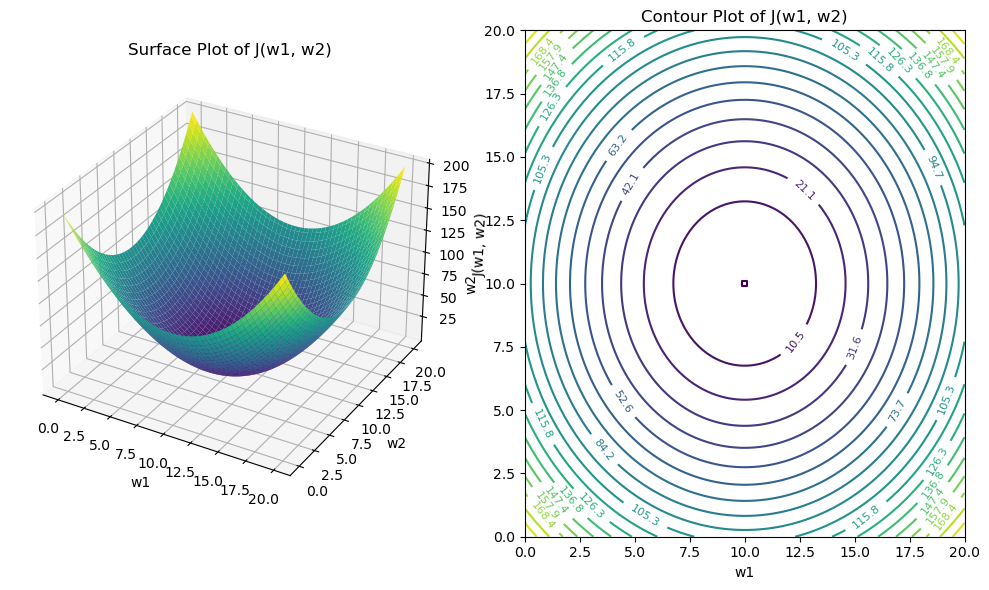

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function J(w1, w2)
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# Generate data for surface plot
w1 = np.linspace(0, 20, 100)
w2 = np.linspace(0, 20, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = J(W1, W2)

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1, w2)')
ax.set_title('Surface Plot of J(w1, w2)')

# Generate data for contour plot
levels = np.linspace(np.min(Z), np.max(Z), 20)

# Plot the contour plot
ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(W1, W2, Z, levels=levels, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Contour Plot of J(w1, w2)')

# Show the plots
plt.tight_layout()
plt.show()


## Question 3

Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.

## Solution

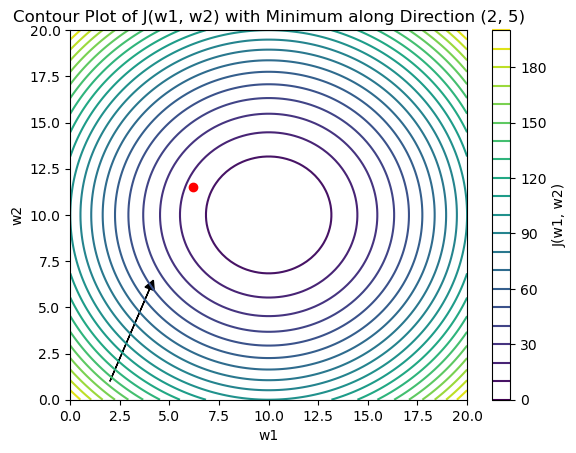

Minimum value along the direction (2, 5): 16.68999999999997
Point of minimum value: [ 6.2 11.5]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function J(w1, w2)
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# Define the direction vector
direction = np.array([2, 5])

# Define the starting point
start_point = np.array([2, 1])

# Line search to find minimum along the direction
def line_search(J, start_point, direction, step_size=0.1):
    current_point = start_point
    min_value = J(*current_point)
    
    while True:
        next_point = current_point + step_size * direction
        next_value = J(*next_point)
        
        if next_value < min_value:
            min_value = next_value
        else:
            break
        
        current_point = next_point
    
    return min_value, current_point

# Perform line search
min_value, min_point = line_search(J, start_point, direction)

# Generate data for contour plot
w1 = np.linspace(0, 20, 100)
w2 = np.linspace(0, 20, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = J(W1, W2)

# Plot the contour plot
plt.contour(W1, W2, Z, levels=20, cmap='viridis')
plt.plot(min_point[0], min_point[1], 'ro')  # Plot the minimum point
plt.arrow(start_point[0], start_point[1], direction[0], direction[1], head_width=0.5, head_length=0.5, fc='k', ec='k')  # Plot the direction vector
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2) with Minimum along Direction (2, 5)')
plt.colorbar(label='J(w1, w2)')
plt.show()

print("Minimum value along the direction (2, 5):", min_value)
print("Point of minimum value:", min_point)
